# #Fingerprints LT4

In [2]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 5, 10

import sys
import os
import numpy as np
sys.path.append(r'D:/measuring')
sys.path.append(r'D:/measuring/analysis')
sys.path.append(r'D:/measuring/analysis/scripts/purification/')

import fp_analysis_load_separate as fp_ls;
reload(fp_ls)
%matplotlib inline  

In [18]:
# loading data
#Combined script, N = [8,16,32,64]
import fp_analysis_load_separate as fp_ls; reload(fp_ls)
listN = [8,16,32,64]#,32,64]

a_list_min, folder_list_min = fp_ls.load_data(N= listN, el_trans = 'min')
# print folder_list_min
a_list_plus, folder_list_plus = fp_ls.load_data(N= listN, el_trans = 'plus') ### 
# print folder_list_plus
print 'Loading complete'


loading data


D:/measuring\analysis\lib\math\error.py:70: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if uncertainties == None:


found no more data, stopping the loop after 100 datasets
Number of datasets is 100
data N8for el_trans min loaded
loading data
found no more data, stopping the loop after 100 datasets
Number of datasets is 100
data N16for el_trans min loaded
loading data
found no more data, stopping the loop after 100 datasets
Number of datasets is 100
data N32for el_trans min loaded
loading data
found no more data, stopping the loop after 100 datasets
Number of datasets is 100
data N64for el_trans min loaded
All data for the specified N loaded via the timestamps in fp_ls
loading data
found no more data, stopping the loop after 40 datasets
Number of datasets is 40
data N8for el_trans plus loaded
loading data
found no more data, stopping the loop after 40 datasets
Number of datasets is 40
data N16for el_trans plus loaded
loading data
found no more data, stopping the loop after 40 datasets
Number of datasets is 40
data N32for el_trans plus loaded
loading data
found no more data, stopping the loop after 4

In [99]:
def findcoupling(fo,fp,fm):
    A = (fp**2-fm**2)/(4*fo)
    B = np.sqrt(8*((fo*fp)**2+(fo*fm)**2)-fp**4-fm**4+2*(fp*fm)**2-16*(fo)**4)/(4*fo)
    return A,B ##parallel and perpendicular

hf_par = []
hf_perp = []
f0s = [443349.78,  442982.61,  442978.96, 442824.75, 443732.93, 443851.31, 443261.6]
print 'this is the average ms=0 frequency', np.average(f0s)
f0s = 7*[443315.96] #### what if i take the lowest number?
fms = [819822.31,  475433.59,  505398.01, 416199.80, 422792.81, 520836.82, 455467.86]
fps = [88066.83,   412584.87,  382234.24, 472344.32, 464341.28, 367062.67, 431635.32]
includeCs = [0,1,2,3,4,5,6]

for ii,f0,fm,fp in zip(range(len(f0s)),f0s,fms,fps):
    if ii in includeCs:
        par,perp  =findcoupling (f0,fp,fm)
        hf_par +=[par]
        hf_perp +=[perp]
    else:
        hf_par += [0]
        hf_perp += [0]

this is the average ms=0 frequency 443283.134286


omega_larmor = 443315.46
in SC B_field = 414.12
in SC HF_par = [374649.7494853824, 31473.50230035211, 61651.363896070034, -28132.80347284499, -20786.001097469125, 76996.99631848553, 11922.603700911857]
in SC HF_perp = [55142.706496970968, 24739.94722772609, 20860.256690693222, 29072.668542599549, 14906.173805563114, 23354.240617715492, 14450.661317406282]
d:\measuring\data\20170809\183126_DecouplingSequence_Hermite_Fingerprint_msm1_111no2_64
omega_larmor = 443315.46
in SC B_field = 414.12
in SC HF_par = [-374649.7494853824, -31473.50230035211, -61651.363896070034, 28132.80347284499, 20786.001097469125, -76996.99631848553, -11922.603700911857]
in SC HF_perp = [55142.706496970968, 24739.94722772609, 20860.256690693222, 29072.668542599549, 14906.173805563114, 23354.240617715492, 14450.661317406282]
d:\measuring\data\20170804\094039_DecouplingSequence_Hermite_Fingerprint_msp1_111no2_64


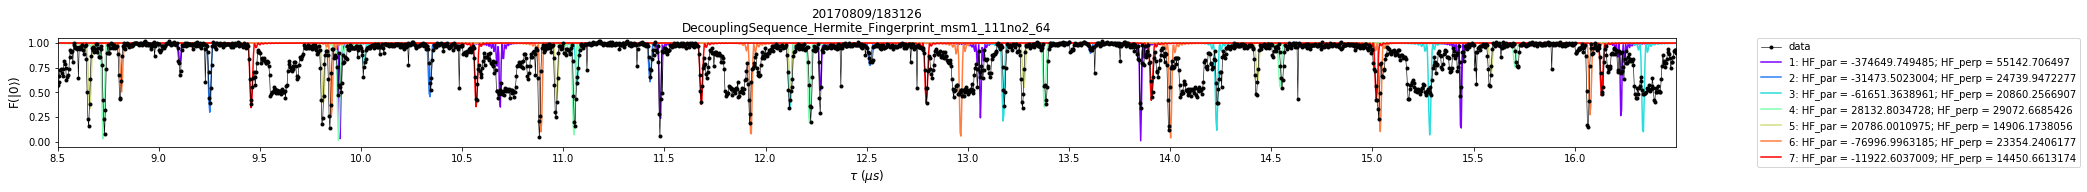

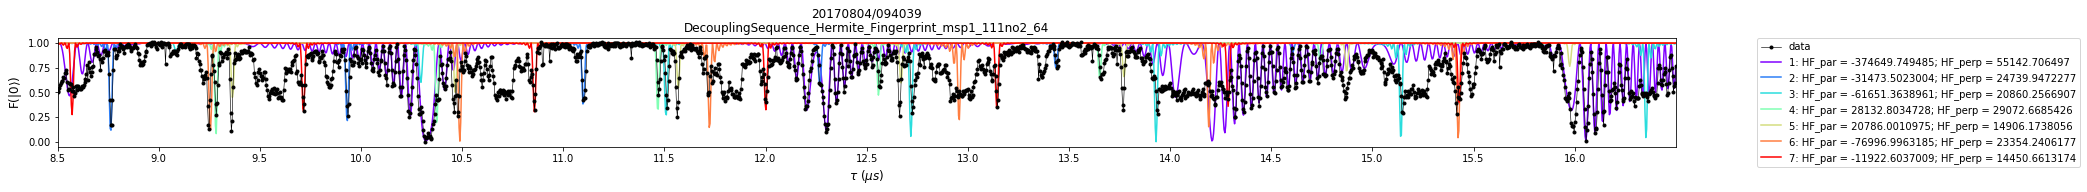

In [97]:
#plot the ms=-1 fp
reload(fp_ls)
listN=[64]
zoom = np.array([8.5,16.5])+0

kws = {'disp_sim_spin' : True, 'N': listN,'HF_perp' : hf_perp, 'HF_par':hf_par,'xlim':zoom,'B_field':414.12}

fp_ls.fingerprint(a = a_list_min, folder = folder_list_min, el_trans = 'min', **kws)
fp_ls.fingerprint(a = a_list_plus, folder = folder_list_plus, el_trans = 'plus', **kws)

In [112]:
#Plot single fingerprint (index takes the entry from the data array)
reload(fp_ls)

index = 3
keys = ['N8','N16','N32','N64']
print listN
# hf_par  = [-365e3,-55e3,26.5e3,-26e3,-72e3,33e3]#[53e3,45e3,-7e3] 
# hf_perp = [100e3,25e3,30e3,18e3,30e3,35e3]#[50e3,25e3,17.5e3]

hf_par =  [-374.9e3, -26e3, -58e3,  33e3,  26.5e3, -72e3]
hf_perp = [49.7e3 ,  18e3,  25e3,  35e3,  30e3  , 30e3]
# hf_par = [-55e3]
# hf_perp = [25e3]
# fp_ls.fingerprint(a = a_list_min, folder = folder_list_min, disp_sim_spin = True, N = [listN[index]],
#                    el_trans = 'min', xlim=np.array([3.5,4.7])+3*0.6,xticks=0.1, HF_par = hf_par, HF_perp = hf_perp)
fp_ls.fingerprint(a = a_list_plus, folder = folder_list_plus, disp_sim_spin = True, N = [listN[index]],
                   el_trans = 'plus', xlim=np.array([3.5,4.7])+13*0.6,xticks=0.1, HF_par = hf_par, HF_perp = hf_perp)

[64]


IndexError: list index out of range

In [ ]:
f_l = 446.6e3
k = 4
tau_k = 4.3e-6
A_par = (k-0.5)/tau_k - 2*f_l
print A_par

In [ ]:
gamma_c = 6.728287e7
gam_correct = gamma_c*1e-4/(2*np.pi)
f_l = 446.6e3
print gam_correct
B_field = f_l/gam_correct 
print B_field

In [ ]:
# Plot plus\

# hyperfine_params_pippin_SIL1_msm1 = {}
# hyperfine_params_pippin_SIL1_msm1['C1']  = {'par' : -335e3 , 'perp':312.5e3}
# hyperfine_params_pippin_SIL1_msm1['C2']  = {'par' : -90e3  , 'perp':122.5e3} 
# hyperfine_params_pippin_SIL1_msm1['C3']  = {'par' : -92.5e3, 'perp':68.8e3}  
# hyperfine_params_pippin_SIL1_msm1['C4']  = {'par' : 22e3,    'perp':25e3}
# hyperfine_params_pippin_SIL1_msm1['C5']  = {'par' : -18e3,   'perp':30e3}
# hyperfine_params_pippin_SIL1_msm1['C6']  = {'par' : -6.3e3,  'perp':27.5e3}
# hyperfine_params_pippin_SIL1_msm1['C7']  = {'par' : 27.5e3,  'perp':27e3}
# hyperfine_params_pippin_SIL1_msm1['C8']  = {'par' : -36.5e3, 'perp':44e3}


hf_par = [-335e3, -18e3, -6.3e3] #+ np.linspace(-6e3,-6.2e3,2).tolist()
hf_perp = [290e3, 30e3, 25e3] #+ np.linspace(20e3, 25e3,2).tolist()
reload(fp_ls)
fp_ls.fingerprint(a = a_list_plus, folder = folder_list_plus, disp_sim_spin = True, N = [8,16,32,64],
                   el_trans = 'plus', xlim=[3.5,27.5] ,xticks=1, HF_par = [],HF_perp = [])

In [ ]:
# only one
hf_par =  np.linspace(-400e3,-400e3,3).tolist()
hf_perp =  np.linspace(350e3, 300e3,3).tolist()
reload(fp_ls)
index = 0
Nlist = [8,16,32,64]
fp_ls.fingerprint(a = [a_list_plus[index]], folder = [folder_list_plus[index]], disp_sim_spin = True, N = [Nlist[index]],
                   el_trans = 'plus', xlim=[3.5,17.5] ,xticks=0.5, HF_par = hf_par,HF_perp = hf_perp)
fp_ls.fingerprint(a = [a_list_plus[index]], folder = [folder_list_plus[index]], disp_sim_spin = True, N = [Nlist[index]],
                   el_trans = 'plus', xlim=[3.5,17.5] ,xticks=0.1, HF_par = hf_par,HF_perp = hf_perp)

In [ ]:
### +1 fp from 04-08-17
reload(fp_ls)
listN = [64]

hf_par =  [-374.9e3, -26e3, -58e3,  33e3,  26.5e3, -72e3]
hf_perp = [49.7e3 ,  18e3,  25e3,  35e3,  30e3  , 30e3]


hf_par =  [-373.9e3, -32.4e3, -62.5e3,  20.5e3,  27.5e3, -78e3]
hf_perp = [52.7e3 ,  22e3,     15e3,     20e3,  20e3  , 31e3]
fp_ls.fingerprint(a = a_list_min, folder = folder_list_min, disp_sim_spin = True, N = listN,
                   el_trans = 'min', HF_perp = hf_perp,xticks=0.5, HF_par = hf_par , xlim = [8.2,10.4])

fp_ls.fingerprint(a = a_list_plus, folder = folder_list_plus, disp_sim_spin = True, N = listN,
                   el_trans = 'plus', HF_perp = hf_perp,xticks=0.5, HF_par = hf_par , xlim = [8.4,16.])



(-374621.1701218659, 55064.913787893092)

1

In [24]:
np.sign(-2)

-1